Figure saved to: ../results/figures/fig3_shapley_paradox.pdf


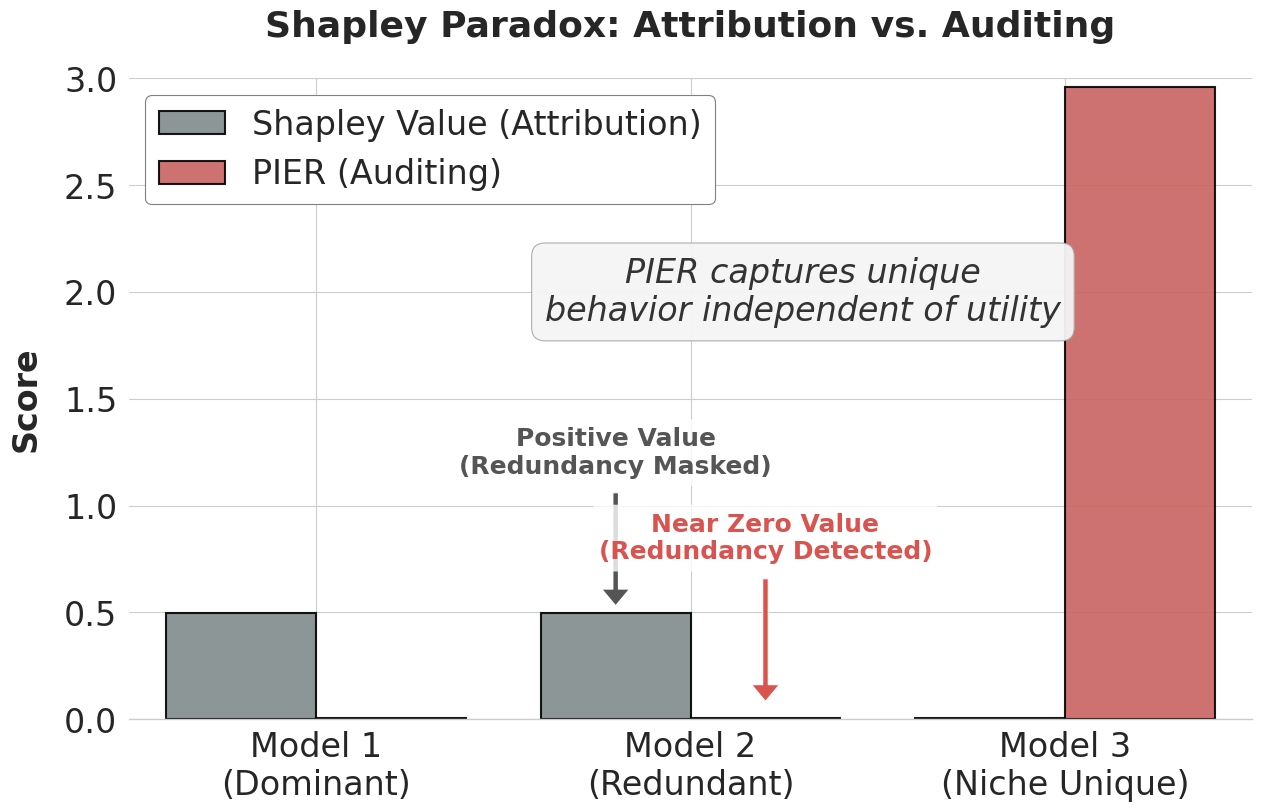

In [42]:
# %% [markdown]
# # Figure 3: The Attribution vs. Auditing Paradox (Final Layout)
# 
# **Updates:**
# * **Annotation Logic:** Updated Model C text to emphasize that agreement on unique models highlights the divergence on redundant ones.
# * **Positioning:** Moved text higher (y=1.48) and added a background box to prevent overlapping with bars.
# * **Arrows:** Adjusted arrow pointers for Model B to be distinct and clear.

# %%
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# %%
# Load Data
DATA_PATH = "../results/tables/exp3_shapley.csv"
FIG_PATH = "../results/figures"
os.makedirs(FIG_PATH, exist_ok=True)

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError("Data file not found. Run experiments/exp3_shapley.py first.")

df = pd.read_csv(DATA_PATH)

# %%
# Configure Nature-Style Aesthetics (Large Fonts)
sns.set_context("paper", font_scale=2.0) 
sns.set_style("whitegrid")

PALETTE = {
    "Shapley Value (Attribution)": "#7F8C8D", # Slate Gray
    "PIER (Auditing)": "#D9534F"              # Nature Red
}

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']

# %%
plt.figure(figsize=(13, 8.5)) # Increased width slightly for better spacing

# Main Plot
ax = sns.barplot(
    data=df,
    x="Model",
    y="Score",
    hue="Metric",
    palette=PALETTE,
    edgecolor="black",
    linewidth=1.5,
    alpha=0.9
)

# --- Labels ---
ax.set_xlabel("", fontsize=24) 
ax.set_ylabel("Score", fontsize=24, fontweight='bold', labelpad=15)
ax.set_title("Shapley Paradox: Attribution vs. Auditing", fontsize=26, pad=30, fontweight='bold')

# --- Axis & Grid ---
ax.tick_params(axis='x', labelsize=24)
ax.tick_params(axis='y', labelsize=24)
# Extend Y-axis to make room for top annotations
ax.set_ylim(0, 3.0) 
ax.grid(axis='x') 
sns.despine(left=True)

# --- Legend ---
# Clean legend with border
ax.legend(
    title="", 
    frameon=True, 
    fontsize=24, 
    loc="upper left", 
    facecolor='white', 
    edgecolor='gray',
    framealpha=1.0
)

# --- Critical Annotations (Optimized Layout) ---

# 1. The Trap (Model B - Shapley)
# Pointing to the top of the Gray Bar (~0.21)
ax.annotate('Positive Value\n(Redundancy Masked)', 
            xy=(0.8, 0.5),           # Tip of arrow
            xytext=(0.8, 1.15),      # Text position (moved slightly right)
            arrowprops=dict(facecolor='#555555', shrink=0.05, width=4, headwidth=20),
            fontsize=18, color='#555555', fontweight='bold', ha='center',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.8))

# 2. The Solution (Model B - PIER)
# Pointing to the bottom Red Bar (~0.02)
ax.annotate('Near Zero Value\n(Redundancy Detected)', 
            xy=(1.2, 0.05),           # Tip of arrow
            xytext=(1.2, 0.75),      # Text position
            arrowprops=dict(facecolor='#D9534F', shrink=0.05, width=4, headwidth=20),
            fontsize=18, color='#D9534F', fontweight='bold', ha='center',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.8))

# 3. The Logic Bridge (Model C)
# High text position with background box to prevent overlap with the tall red bar
ax.text(1.3, 2.0, 
        "PIER captures unique\nbehavior independent of utility", 
        ha='center', va='center', fontsize=24, style='italic', color='#333333',
        bbox=dict(boxstyle="round,pad=0.4", fc="#F5F5F5", ec="#AAAAAA", alpha=0.95))

plt.tight_layout()

# %%
# Save
save_path = os.path.join(FIG_PATH, "fig3_shapley_paradox.pdf")
plt.savefig(save_path, format="pdf", dpi=300, bbox_inches="tight")
print(f"Figure saved to: {save_path}")
plt.show()

Figure saved to: ../results/figures/shapley_paradox_dumbbell.pdf


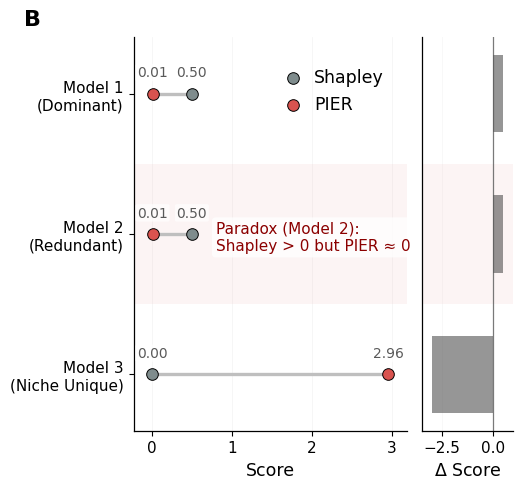

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# -------------------------
# Load
# -------------------------
DATA_PATH = "../results/tables/exp3_shapley.csv"
FIG_PATH  = "../results/figures"
os.makedirs(FIG_PATH, exist_ok=True)

df = pd.read_csv(DATA_PATH)

# Expect: Model, Score, Metric
req = {"Model", "Score", "Metric"}
missing = req - set(df.columns)
if missing:
    raise ValueError(f"Missing columns {missing}. Found: {list(df.columns)}")

# -------------------------
# Pivot to wide
# -------------------------
COL_SHAP = "Shapley Value (Attribution)"
COL_PIER = "PIER (Auditing)"

wide = df.pivot(index="Model", columns="Metric", values="Score")

if COL_SHAP not in wide.columns or COL_PIER not in wide.columns:
    raise ValueError(f"Expected metrics '{COL_SHAP}' and '{COL_PIER}' in data. Found: {list(wide.columns)}")

wide = wide.rename(columns={COL_SHAP: "Shapley", COL_PIER: "PIER"}).copy()
wide["Delta"] = wide["Shapley"] - wide["PIER"]  # paradox magnitude

# A clean ordering: sort by PIER (auditing) or by Delta (paradox)
wide = wide.sort_values(["PIER", "Delta"], ascending=[True, False])

# -------------------------
# Nature-ish rcParams (match your other panels)
# -------------------------
plt.rcParams.update({
    "font.family": "DejaVu Sans",
    "font.size": 12.5,
    "axes.labelsize": 12.5,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "axes.linewidth": 0.9,
    "axes.spines.top": False,
    "axes.spines.right": False,
})

# Palette (cool + print-friendly)
C_SHAP = "#7F8C8D"   # slate gray
C_PIER = "#D9534F"   # muted red
C_LINK = "0.75"      # light gray connector
C_HL   = "#D9534F"   # highlight color for Model B row (very light alpha)

# -------------------------
# Figure layout: main dumbbell + delta panel
# -------------------------
fig = plt.figure(figsize=(5.2, 4.8))
gs = GridSpec(1, 2, width_ratios=[3.6, 1.2], wspace=0.08)
ax  = fig.add_subplot(gs[0])
axd = fig.add_subplot(gs[1], sharey=ax)

# y positions
models = sorted(wide.index.tolist())
y = np.arange(len(models))

# Optional: highlight the paradox model
# (Keep this subtle, it reads "pro" not "cartoon".)
if "Model 2\n(Redundant)" in models:
    i = models.index("Model 2\n(Redundant)")
    ax.axhspan(i - 0.5, i + 0.5, color=C_HL, alpha=0.06, lw=0)
    axd.axhspan(i - 0.5, i + 0.5, color=C_HL, alpha=0.06, lw=0)

# connectors
x1 = wide["Shapley"].to_numpy()
x2 = wide["PIER"].to_numpy()
xmin = float(np.nanmin(np.r_[x1, x2]))
xmax = float(np.nanmax(np.r_[x1, x2]))
pad  = 0.08 * (xmax - xmin + 1e-12)

for yi, a, b in zip(y, x1, x2):
    ax.plot([a, b], [yi, yi], color=C_LINK, lw=2.4, zorder=1, solid_capstyle="round")

# endpoints
ax.scatter(x1, y, s=70, color=C_SHAP, edgecolor="black", linewidth=0.7, zorder=3, label="Shapley")
ax.scatter(x2, y, s=70, color=C_PIER, edgecolor="black", linewidth=0.7, zorder=4, label="PIER")

# Labels for each endpoint (works well because you usually have few models here)
# If you have many models, comment this out or only label Model B/C.
# value labels ABOVE the points (avoid overlap with the connector line)
y_offset = 0.1  # vertical offset in "row units" (tune 0.18~0.30)

label_bbox = dict(boxstyle="round,pad=0.12", facecolor="white", edgecolor="none", alpha=0.70)

for yi, a, b in zip(y, x1, x2):
    ax.text(
        a, yi - y_offset, f"{a:.2f}",
        ha="center", va="bottom",
        fontsize=10, color="0.35",
        bbox=label_bbox,
        zorder=10
    )
    ax.text(
        b, yi - y_offset, f"{b:.2f}",
        ha="center", va="bottom",
        fontsize=10, color="0.35",
        bbox=label_bbox,
        zorder=10
    )


# Main axis styling
ax.set_yticks(y)
ax.set_yticklabels(models)
ax.invert_yaxis()  # top-to-bottom reading
ax.set_xlabel("Score")
ax.grid(True, axis="x", linewidth=0.6, alpha=0.12)
ax.set_axisbelow(True)

ax.set_xlim(xmin - pad, xmax + pad)

# Legend (small, clean)
ax.legend(frameon=False, loc="upper left", bbox_to_anchor=(0.5, 0.96),handlelength=0.8)

# One compact callout for the paradox (no giant arrows)
if "Model 2\n(Redundant)" in models:
    i = models.index("Model 2\n(Redundant)")
    ax.text(
        0.3, 0.45,
        "Paradox (Model 2):\nShapley > 0 but PIER ≈ 0",
        transform=ax.transAxes,
        fontsize=11,
        color="darkred",
        ha="left",
        va="bottom",
        bbox=dict(boxstyle="round,pad=0.25", facecolor="white", edgecolor="none", alpha=0.75),
    )

# -------------------------
# Delta panel: Shapley - PIER
# -------------------------
d = wide["Delta"].to_numpy()

axd.axvline(0.0, color="0.35", lw=0.9, alpha=0.8)
axd.barh(y, d, height=0.55, color="0.25", alpha=0.55)
axd.set_xlabel(r"$\Delta$ Score")
axd.grid(True, axis="x", linewidth=0.6, alpha=0.10)
axd.set_axisbelow(True)

# Hide duplicate y labels on delta axis
plt.setp(axd.get_yticklabels(), visible=False)
axd.tick_params(axis="y", length=0)

# Tight xlim for delta (prettier)
dmin = float(np.nanmin(d))
dmax = float(np.nanmax(d))
dpad = 0.15 * (dmax - dmin + 1e-12)
axd.set_xlim(dmin - dpad, dmax + dpad)

# Final layout
fig.subplots_adjust(left=0.25, right=0.98, top=0.92, bottom=0.16)

ax.text(-0.4, 1.02, "B", transform=ax.transAxes, fontsize=16, fontweight="bold", va="bottom")

save_path = os.path.join(FIG_PATH, "shapley_paradox_dumbbell.pdf")
fig.savefig(save_path, format="pdf")
print(f"Figure saved to: {save_path}")

plt.show()
